<h2 style="text-align:center">Data Exploration and Data Visualizations - EXTRA 1</h2>

---

#### 0° - Import Libraries, Datasets and Set Paths

In [3]:
import os
import pandas as pd
import numpy as np
import random
import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import re

### Import de la base de code NAF

In [ ]:
pathData = 'data'

In [4]:
naf_code_df = pd.read_excel(os.path.join(pathData,'int_courts_naf_rev_2.xls')).dropna().reset_index(drop=True)
col_list = list(naf_code_df.columns)
naf_code_df = naf_code_df.drop(columns = [col_list[0], col_list[2], col_list[3]])
naf_code_df = naf_code_df.rename(columns = {'Code': 'NAF', col_list[-1]: 'Intitulés'})

section_intitule_table = naf_code_df[naf_code_df['NAF'].str.contains('SECTION')].reset_index(drop=True)
section_intitule_table

naf_code_df['SECTION'] = naf_code_df['NAF'].str.extract('SECTION ([A-Z])')
naf_code_df['SECTION'].fillna(method='ffill', inplace=True)
naf_code_df = naf_code_df[~naf_code_df['NAF'].str.contains('SECTION')].reset_index(drop=True)

In [ ]:
naf_code_df.head()

,NAF,Intitulés,SECTION
0,01,"Cult. & prod. animale, chasse & sce ann.",A
1,01.1,Cultures non permanentes,A
2,01.11,"Cult céréale, légumineuse, graine oléag.",A
3,01.11Z,"Cult céréale, légumineuse, graine oléag.",A
4,01.12,Culture du riz,A


### Table de correspondance Section -> Intitulés

In [ ]:
section_intitule_table

,NAF,Intitulés
0,SECTION A,"AGRICULTURE, SYLVICULTURE ET PÊCHE"
1,SECTION B,INDUSTRIES EXTRACTIVES
2,SECTION C,INDUSTRIE MANUFACTURIÈRE
3,SECTION D,Prdn & distr. élec. gaz vap. & air cond.
4,SECTION E,"Gestion eau, déchets & dépollution"
5,SECTION F,CONSTRUCTION
6,SECTION G,COMMERCE ; RÉPAR. AUTOMOBILE & MOTOCYCLE
7,SECTION H,TRANSPORTS ET ENTREPOSAGE
8,SECTION I,HÉBERGEMENT ET RESTAURATION
9,SECTION J,INFORMATION ET COMMUNICATION


### Découpage de StockUniteLegale_utf8.csv selon les SECTIONs NAF

In [ ]:
filename = os.path.join(pathData,'StockUniteLegale_utf8.csv')

# Define the chunk size
chunk_size = 100000

list_section = naf_code_df.SECTION.unique()
for section in list_section:
  NAF_codes = list(naf_code_df[naf_code_df['SECTION'] == section]['NAF'])
  print('Processing Section {}'.format(section))
  NAF_df = pd.DataFrame()
  # Read the CSV file in chunks
  for chunk in pd.read_csv(filename, chunksize=chunk_size, low_memory=False):
    NAF_df = pd.concat([NAF_df,chunk[chunk['activitePrincipaleUniteLegale'].isin(NAF_codes)]])
  NAF_df.reset_index(drop=True).to_csv(os.path.join(pathData, 'split_df', 'StockUniteLegale_' + section + '.csv'))
  print('Saved Section {}'.format(section))

Processing Section A
Processing Section B
Processing Section C
Processing Section D
Processing Section E
Processing Section F
Processing Section G
Processing Section H
Processing Section I
Processing Section J
Processing Section K
Processing Section L
Processing Section M
Processing Section N
Processing Section O
Processing Section P
Processing Section Q
Processing Section R
Processing Section S
Processing Section T
Processing Section U


### Vérification du découpage pour la SECTION I

In [176]:
df_I = pd.read_csv(os.path.join(pathData, 'split_df', 'StockUniteLegale_I.csv'), low_memory=False)
df_I = pd.merge(df_I, naf_code_df, right_on = 'NAF', left_on ='activitePrincipaleUniteLegale')
df_I['yearCreation'] = pd.DatetimeIndex(df_I['dateCreationUniteLegale']).year
df_I.head()

,Unnamed: 0,siren,statutDiffusionUniteLegale,unitePurgeeUniteLegale,dateCreationUniteLegale,sigleUniteLegale,sexeUniteLegale,prenom1UniteLegale,prenom2UniteLegale,prenom3UniteLegale,...,activitePrincipaleUniteLegale,nomenclatureActivitePrincipaleUniteLegale,nicSiegeUniteLegale,economieSocialeSolidaireUniteLegale,societeMissionUniteLegale,caractereEmployeurUniteLegale,NAF,Intitulés,SECTION,yearCreation
0,0,5450119,O,NaN,1954-01-01,NaN,NaN,NaN,NaN,NaN,...,56.30Z,NAFRev2,28,NaN,NaN,N,56.30Z,Débits de boissons,I,1954.0
1,10,5911094,O,NaN,1959-01-01,NaN,F,RENEE,NaN,NaN,...,56.30Z,NAFRev2,18,NaN,NaN,N,56.30Z,Débits de boissons,I,1959.0
2,12,5970413,O,NaN,1959-01-01,NaN,F,MADELEINE,NaN,NaN,...,56.30Z,NAFRev2,18,NaN,NaN,N,56.30Z,Débits de boissons,I,1959.0
3,20,6150148,O,NaN,1961-01-01,NaN,NaN,NaN,NaN,NaN,...,56.30Z,NAFRev2,10,N,NaN,O,56.30Z,Débits de boissons,I,1961.0
4,22,6241657,O,NaN,1962-01-01,NaN,F,LUCIENNE,NaN,NaN,...,56.30Z,NAFRev2,11,NaN,NaN,N,56.30Z,Débits de boissons,I,1962.0


### Visualisation des bases réduites sans découpage

In [6]:
pd.set_option('display.max_columns', None)

In [ ]:
stock_etab = pd.read_csv(os.path.join(pathData,'StockEtablissement_utf8.csv'), nrows=1000)
stock_etab_historique = pd.read_csv(os.path.join(pathData,'StockEtablissementHistorique_utf8.csv'), nrows=1000)
stock_etab_liens_succession = pd.read_csv(os.path.join(pathData,'StockEtablissementLiensSuccession_utf8.csv'), nrows=1000)
stock_unite_legale = pd.read_csv(os.path.join(pathData,'StockUniteLegale_utf8.csv'), nrows=1000)
stock_unite_legale_histo = pd.read_csv(os.path.join(pathData,'StockUniteLegaleHistorique_utf8.csv'), nrows=1000)

In [ ]:
stock_unite_legale_histo[stock_unite_legale_histo.siren == 325175]

,siren,dateFin,dateDebut,etatAdministratifUniteLegale,changementEtatAdministratifUniteLegale,nomUniteLegale,changementNomUniteLegale,nomUsageUniteLegale,changementNomUsageUniteLegale,denominationUniteLegale,changementDenominationUniteLegale,denominationUsuelle1UniteLegale,denominationUsuelle2UniteLegale,denominationUsuelle3UniteLegale,changementDenominationUsuelleUniteLegale,categorieJuridiqueUniteLegale,changementCategorieJuridiqueUniteLegale,activitePrincipaleUniteLegale,nomenclatureActivitePrincipaleUniteLegale,changementActivitePrincipaleUniteLegale,nicSiegeUniteLegale,changementNicSiegeUniteLegale,economieSocialeSolidaireUniteLegale,changementEconomieSocialeSolidaireUniteLegale,societeMissionUniteLegale,changementSocieteMissionUniteLegale,caractereEmployeurUniteLegale,changementCaractereEmployeurUniteLegale
0,325175,NaN,2018-02-07,A,False,JANOYER,False,NaN,False,NaN,False,NaN,NaN,NaN,False,1000.0,False,32.12Z,NAFRev2,False,65.0,True,NaN,False,NaN,False,N,False
1,325175,2018-02-06,2014-01-07,A,False,JANOYER,False,NaN,False,NaN,False,NaN,NaN,NaN,False,1000.0,False,32.12Z,NAFRev2,False,57.0,True,NaN,False,NaN,False,N,False
2,325175,2014-01-06,2011-10-21,A,False,JANOYER,False,NaN,False,NaN,False,NaN,NaN,NaN,False,1000.0,False,32.12Z,NAFRev2,False,40.0,True,NaN,False,NaN,False,N,False
3,325175,2011-10-20,2009-05-27,A,False,JANOYER,False,NaN,False,NaN,False,NaN,NaN,NaN,False,1000.0,False,32.12Z,NAFRev2,False,32.0,True,NaN,False,NaN,False,N,False
4,325175,2009-05-26,2008-01-01,A,False,JANOYER,False,NaN,False,NaN,False,NaN,NaN,NaN,False,1000.0,False,32.12Z,NAFRev2,True,16.0,False,NaN,False,NaN,False,N,False
5,325175,2007-12-31,2000-09-26,A,False,JANOYER,False,NaN,False,NaN,False,NaN,NaN,NaN,False,1000.0,False,NaN,NaN,False,16.0,False,NaN,False,NaN,False,N,False


In [ ]:
naf_code_df[naf_code_df['NAF']=='95.24Z']

,NAF,Intitulés,SECTION
1673,95.24Z,Réparation meubles & d'équipt du foyer,S


### Génération automatique des graphiques pour chaque section (à retrouver sur le github dans le dossier graphique)
#### 1. Distribution par section de chaque code NAF
#### 2. Boxplot du nombre de périodes pour chaque code NAF

In [ ]:
for file in os.listdir(os.path.join(pathData, 'split_df')):
  if os.path.isfile(os.path.join(pathData, 'split_df',file)):

    section = re.findall(r'[A-Z]', file.split('_')[1])[0]
    print(section)
    df = pd.read_csv(os.path.join(pathData, 'split_df', file), low_memory=False)
    df = pd.merge(df, naf_code_df, right_on = 'NAF', left_on ='activitePrincipaleUniteLegale')
    df['yearCreation'] = pd.DatetimeIndex(df['dateCreationUniteLegale']).year

    intitule = section_intitule_table[section_intitule_table['NAF'] == 'SECTION ' + section]['Intitulés'].tolist()
    intitule_name = intitule[0]

    df_val_counts = pd.DataFrame(df.Intitulés.value_counts(normalize=True).mul(100).round(1))
    df_val_counts['Counter'] = df_val_counts['Intitulés']
    df_val_counts['Intitulés'] = df_val_counts.index
    df_val_counts = df_val_counts.reset_index(drop=True)
    
    most_int = df_val_counts[df_val_counts['Counter'] > 1]['Intitulés'].tolist()
    top_df = df[df['Intitulés'].isin(most_int)]

    sns.set_style("white")
    fig, ax = plt.subplots(1, 1, figsize=(16, 9), sharey=True)
    ax1 = sns.barplot(x = 'Counter', y = 'Intitulés', data = df_val_counts, palette = "Spectral", capsize= 0.05)
    ax1.set_xlabel("Percentage [%]", size=20)
    ax1.set_ylabel("Intitulés", size=20)
    plt.setp(ax1.get_xticklabels(), fontsize=14)
    plt.setp(ax1.get_yticklabels(), fontsize=14)
    plt.title("Distribution des intitulés pour la section {}".format(intitule_name), ha = 'center', size=16)
    fig.tight_layout()
    fig.subplots_adjust(right=0.82)
    plt.savefig(os.path.join(pathData, 'split_df','fig', 'distribution_{}'.format(section)), bbox_inches = 'tight')
    plt.clf()
        
    sns.set_style("white")
    fig, ax = plt.subplots(1, 1, figsize=(16, 9), sharey=True)
    ax2 = sns.boxplot(x = 'nombrePeriodesUniteLegale', y = 'Intitulés', data = top_df, palette = "Spectral")
    ax2.set_xlabel("Nombres de périodes pour une unité légale", size=20)
    ax2.set_ylabel("Intitulés", size=20)
    plt.setp(ax2.get_xticklabels(), fontsize=14)
    plt.setp(ax2.get_yticklabels(), fontsize=14)
    plt.title("Comparaison du nombre de moments de vie selon les intitulés de la section {}".format(intitule_name), ha = 'center', size=16)
    fig.tight_layout()
    fig.subplots_adjust(right=0.82)
    plt.xlim(0,12)
    plt.savefig(os.path.join(pathData, 'split_df','fig', 'box_{}'.format(section)), bbox_inches = 'tight')
    plt.clf()

### Moyenne du nombre de période d'unité légale pour chaque section

In [36]:
df_tot_mean = pd.DataFrame()
for file in os.listdir(os.path.join(pathData, 'split_df')):
  if os.path.isfile(os.path.join(pathData, 'split_df',file)):

    section = re.findall(r'[A-Z]', file.split('_')[1])[0]
    print(section)
    df = pd.read_csv(os.path.join(pathData, 'split_df', file), low_memory=False)
    df = pd.merge(df, naf_code_df, right_on = 'NAF', left_on ='activitePrincipaleUniteLegale')
    df['yearCreation'] = pd.DatetimeIndex(df['dateCreationUniteLegale']).year

    intitule = section_intitule_table[section_intitule_table['NAF'] == 'SECTION ' + section]['Intitulés'].tolist()
    intitule_name = intitule[0]

    df_mean = pd.DataFrame(df.groupby('Intitulés')['nombrePeriodesUniteLegale'].mean())
    df_mean['Intitulés'] = df_mean.index
    df_mean = df_mean.reset_index(drop=True)

    df_tot_mean = pd.concat([df_tot_mean, df_mean])

A
B
C
D
E
F
G
H
I
J
K
L
M
N
O
P
Q
R
S
T
U


In [ ]:
df = df_tot_mean.copy()
df.sort_values(by=['nombrePeriodesUniteLegale'], ascending = False)
merge_df = pd.merge(df, naf_code_df, how="left", on=["Intitulés", "Intitulés"])
merge_naf = merge_df[merge_df['NAF'].str.contains('([A-Z])')].sort_values(by='nombrePeriodesUniteLegale', ascending = False).reset_index(drop=True)
merge_naf.to_csv(os.path.join(pathData, 'mean_periode_naf.csv'))

In [183]:
merge_naf[merge_naf['SECTION'] == 'I']

,nombrePeriodesUniteLegale,Intitulés,NAF,SECTION
119,4.719745,Autres hébergements,55.90Z,I
157,4.489766,Restauration collective sous contrat,56.29A,I
158,4.487069,Terrain camping & parc pr caravane etc.,55.30Z,I
175,4.396355,Autres services de restauration n.c.a.,56.29B,I
296,3.962288,Débits de boissons,56.30Z,I
345,3.809952,Restauration traditionnelle,56.10A,I
358,3.764288,Hôtels et hébergement similaire,55.10Z,I
408,3.611556,Cafétérias et autres libres-services,56.10B,I
550,3.177407,Restauration de type rapide,56.10C,I
623,2.881556,Services des traiteurs,56.21Z,I


In [188]:
more6_df = merge_naf[merge_naf['nombrePeriodesUniteLegale'] > 6]
more6_df

,nombrePeriodesUniteLegale,Intitulés,NAF,SECTION
0,10.428571,Constr. véhicules militaires de combat,30.40Z,C
1,7.357143,Enrichissment & retrait. mat. nucléaire,20.13A,C
2,7.000000,Cokéfaction,19.10Z,C
3,6.846154,Fabrication de produits explosifs,20.51Z,C
4,6.647510,Fabrication de carton ondulé,17.21A,C
5,6.567759,Hypermarchés,47.11F,G
6,6.371795,Hébergement social pour toxicomanes,87.20B,Q
7,6.337349,Transport d'électricité,35.12Z,D
8,6.307692,Fabric. d'emballages métalliques légers,25.92Z,C
9,6.243902,Fab. aut. prod. céram. à usage technique,23.44Z,C


### Livreur

In [5]:
df_H = pd.read_csv(os.path.join(pathData, 'split_df', 'StockUniteLegale_H.csv'), low_memory=False)
df_H = pd.merge(df_H, naf_code_df, right_on = 'NAF', left_on ='activitePrincipaleUniteLegale')
df_H['yearCreation'] = pd.DatetimeIndex(df_H['dateCreationUniteLegale']).year
auto_df = df_H[df_H['categorieJuridiqueUniteLegale'].isin([1,10,1000])]
livreur_df = auto_df[auto_df['activitePrincipaleUniteLegale']=='53.20Z']
livreur_df

,Unnamed: 0,siren,statutDiffusionUniteLegale,unitePurgeeUniteLegale,dateCreationUniteLegale,sigleUniteLegale,sexeUniteLegale,prenom1UniteLegale,prenom2UniteLegale,prenom3UniteLegale,...,activitePrincipaleUniteLegale,nomenclatureActivitePrincipaleUniteLegale,nicSiegeUniteLegale,economieSocialeSolidaireUniteLegale,societeMissionUniteLegale,caractereEmployeurUniteLegale,NAF,Intitulés,SECTION,yearCreation
299777,88,24047813,O,NaN,1999-01-25,NaN,F,CARINE,NaN,NaN,...,53.20Z,NAFRev2,19,NaN,NaN,O,53.20Z,Autres activités de poste et de courrier,H,1999.0
299780,385,54391644,O,NaN,2004-03-18,NaN,M,BOINAIDI,NaN,NaN,...,53.20Z,NAFRev2,17,NaN,NaN,N,53.20Z,Autres activités de poste et de courrier,H,2004.0
299781,750,77010197,O,NaN,1965-01-01,NaN,M,GILBERT,NaN,NaN,...,53.20Z,NAFRev2,18,NaN,NaN,N,53.20Z,Autres activités de poste et de courrier,H,1965.0
299782,791,87272357,O,NaN,1972-01-01,NaN,M,DANY,NaN,NaN,...,53.20Z,NAFRev2,69,NaN,NaN,N,53.20Z,Autres activités de poste et de courrier,H,1972.0
299783,922,99376568,O,NaN,1995-02-09,NaN,M,SAID,NaN,NaN,...,53.20Z,NAFRev2,38,NaN,NaN,N,53.20Z,Autres activités de poste et de courrier,H,1995.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616321,633920,950428474,O,NaN,1989-10-02,NaN,F,SYLVIE,JOSE,NaN,...,53.20Z,NAFRev2,15,NaN,NaN,N,53.20Z,Autres activités de poste et de courrier,H,1989.0
616322,633922,950447722,O,NaN,1989-10-10,NaN,M,PASCAL,NaN,NaN,...,53.20Z,NAFRev2,30,NaN,NaN,O,53.20Z,Autres activités de poste et de courrier,H,1989.0
616323,633929,950451740,O,NaN,1989-09-01,NaN,M,DANIEL,NaN,NaN,...,53.20Z,NAFRev2,35,NaN,NaN,N,53.20Z,Autres activités de poste et de courrier,H,1989.0
616324,633976,950575639,O,NaN,1900-01-01,NaN,M,REMY,NaN,NaN,...,53.20Z,NAFRev2,30,NaN,NaN,N,53.20Z,Autres activités de poste et de courrier,H,1900.0


In [6]:
df_year_nb_livreur = pd.DataFrame(df_H.yearCreation.value_counts())
df_year_nb_livreur['Counter'] = df_year_nb_livreur['yearCreation']
df_year_nb_livreur['yearCreation'] = df_year_nb_livreur.index
df_year_nb_livreur = df_year_nb_livreur.reset_index(drop=True)
df_year_nb_livreur = df_year_nb_livreur[df_year_nb_livreur['yearCreation'] <= 2022].sort_values(by='yearCreation',ascending=False)

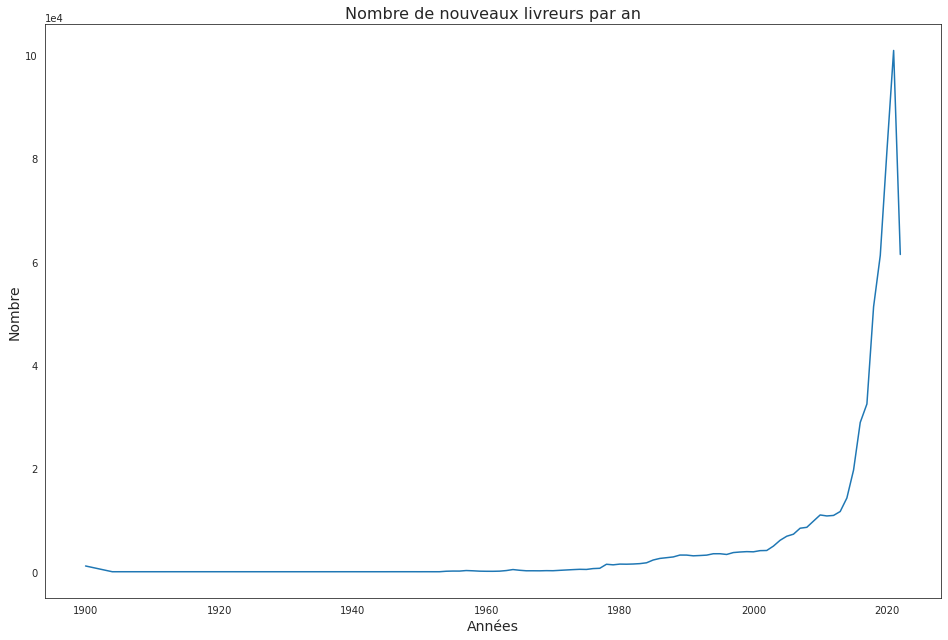

In [7]:
sns.set_style("white")
fig, ax = plt.subplots(1, 1, figsize=(16, 9), sharey=True)
plt.ticklabel_format(style='sci', axis='y', scilimits=(4,4))
plt.plot(df_year_nb_livreur['yearCreation'], df_year_nb_livreur['Counter'])
plt.xlabel("Années", fontsize=14)
plt.ylabel("Nombre", fontsize=14)
plt.title('Nombre de nouveaux livreurs par an', ha = 'center', size=16)
fig.tight_layout()
fig.subplots_adjust(right=0.82)

(0.0, 6.0)

<Figure size 432x288 with 0 Axes>

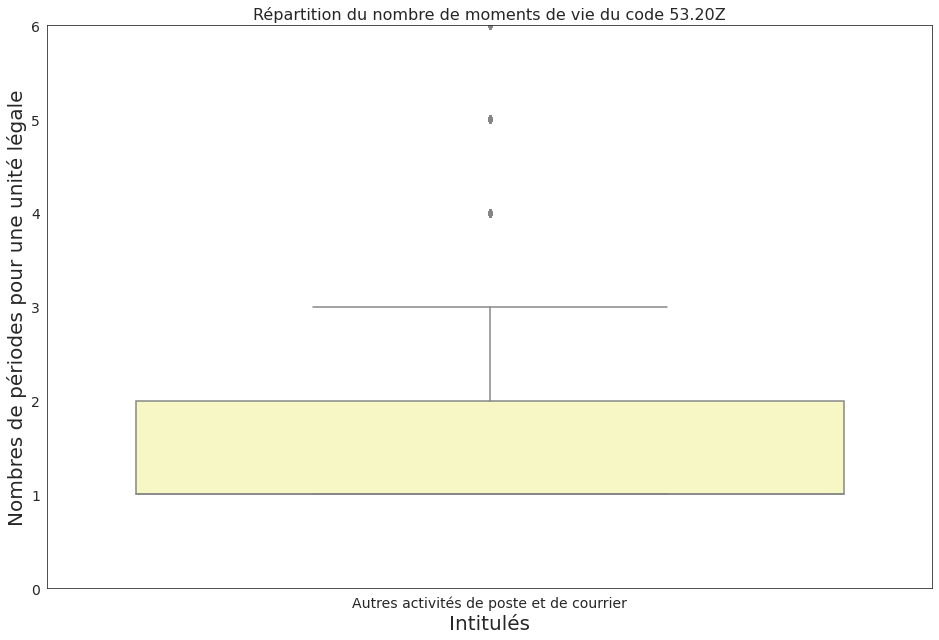

In [23]:
plt.clf()
sns.set_style("white")
fig, ax = plt.subplots(1, 1, figsize=(16, 9), sharey=True)
ax2 = sns.boxplot(x = 'Intitulés', y = 'nombrePeriodesUniteLegale', data = livreur_df, palette = "Spectral")
ax2.set_ylabel("Nombres de périodes pour une unité légale", size=20)
ax2.set_xlabel("Intitulés", size=20)
plt.setp(ax2.get_xticklabels(), fontsize=14)
plt.setp(ax2.get_yticklabels(), fontsize=14)
plt.title("Répartition du nombre de moments de vie du code 53.20Z", ha = 'center', size=16)
fig.tight_layout()
fig.subplots_adjust(right=0.82)
plt.ylim(0,6)